# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | tiaret
Processing Record 6 of Set 1 | sabang
Processing Record 7 of Set 1 | kiunga
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | wuwei
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | pyt-yakh
Processing Record 14 of Set 1 | haiku-pauwela
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | bardaskan
City not found. Skipping...
Processing Record 17 of Set 1 | qarazhal
Processing Record 18 of Set 1 | rongelap
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | blackmans bay
Processing R

Processing Record 41 of Set 4 | banfora
Processing Record 42 of Set 4 | vakhrushi
Processing Record 43 of Set 4 | kapa'a
Processing Record 44 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 45 of Set 4 | mukah
City not found. Skipping...
Processing Record 46 of Set 4 | thai nguyen
Processing Record 47 of Set 4 | tsiombe
Processing Record 48 of Set 4 | wailua homesteads
Processing Record 49 of Set 4 | zhangatas
Processing Record 0 of Set 5 | calvinia
Processing Record 1 of Set 5 | poulsbo
Processing Record 2 of Set 5 | jamestown
Processing Record 3 of Set 5 | turpan
Processing Record 4 of Set 5 | saint-joseph
Processing Record 5 of Set 5 | dolbeau-mistassini
Processing Record 6 of Set 5 | kikwit
Processing Record 7 of Set 5 | yellowknife
Processing Record 8 of Set 5 | acapulco de juarez
Processing Record 9 of Set 5 | vodnyy
Processing Record 10 of Set 5 | rio grande
Processing Record 11 of Set 5 | afif
Processing Record 12 of Set 5 | raja
Processing Record 13 of Set 5

Processing Record 30 of Set 8 | kapit
Processing Record 31 of Set 8 | geraldton
Processing Record 32 of Set 8 | pangody
Processing Record 33 of Set 8 | licheng
Processing Record 34 of Set 8 | ilhabela
Processing Record 35 of Set 8 | kourou
Processing Record 36 of Set 8 | nadym
Processing Record 37 of Set 8 | plymouth
Processing Record 38 of Set 8 | ancud
Processing Record 39 of Set 8 | cuito
Processing Record 40 of Set 8 | carnarvon
Processing Record 41 of Set 8 | puerto aysen
Processing Record 42 of Set 8 | egilsstadir
Processing Record 43 of Set 8 | wanning
Processing Record 44 of Set 8 | ligaya
Processing Record 45 of Set 8 | san antonio de pale
Processing Record 46 of Set 8 | puerto san jose
Processing Record 47 of Set 8 | jinhua
Processing Record 48 of Set 8 | conception bay south
Processing Record 49 of Set 8 | santiago de cao
Processing Record 0 of Set 9 | fujin
Processing Record 1 of Set 9 | mount pearl
Processing Record 2 of Set 9 | novaya ladoga
Processing Record 3 of Set 9 |

Processing Record 18 of Set 12 | kupang
Processing Record 19 of Set 12 | taroa
Processing Record 20 of Set 12 | andergrove
Processing Record 21 of Set 12 | belmonte
Processing Record 22 of Set 12 | saratamata
City not found. Skipping...
Processing Record 23 of Set 12 | mesyagutovo
Processing Record 24 of Set 12 | ilha de mocambique
Processing Record 25 of Set 12 | benicassim
Processing Record 26 of Set 12 | roding
Processing Record 27 of Set 12 | nacala
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.37,85,100,5.47,PN,1701663992
1,vilyuchinsk,52.9306,158.4028,-3.85,72,29,3.55,RU,1701663993
2,margaret river,-33.9500,115.0667,19.57,61,100,4.82,AU,1701663993
3,talnakh,69.4865,88.3972,-34.25,85,12,0.81,RU,1701663993
4,tiaret,35.3710,1.3170,6.69,33,0,9.77,DZ,1701663993


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.37,85,100,5.47,PN,1701663992
1,vilyuchinsk,52.9306,158.4028,-3.85,72,29,3.55,RU,1701663993
2,margaret river,-33.9500,115.0667,19.57,61,100,4.82,AU,1701663993
3,talnakh,69.4865,88.3972,-34.25,85,12,0.81,RU,1701663993
4,tiaret,35.3710,1.3170,6.69,33,0,9.77,DZ,1701663993


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

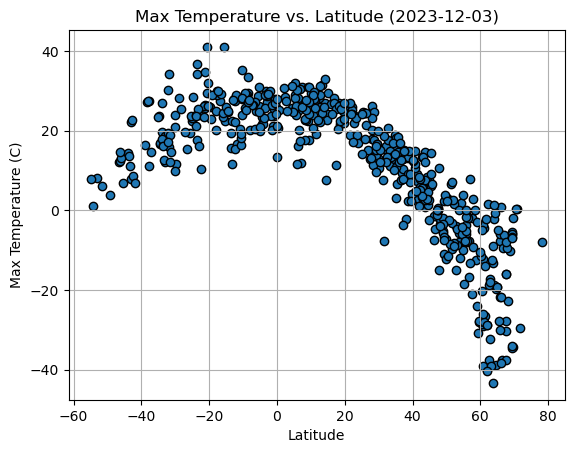

In [8]:
# Build scatter plot for latitude vs. temperature
lat_scatter = city_data_df['Lat']
temp_scatter = city_data_df['Max Temp']
lat_temp_scatter = plt.scatter(lat_scatter, temp_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
import datetime
unix_time = city_data_df['Date'].median()
time_converting = datetime.datetime.fromtimestamp(unix_time)
figure_date = time_converting.strftime('%Y-%m-%d')
title = f'Max Temperature vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

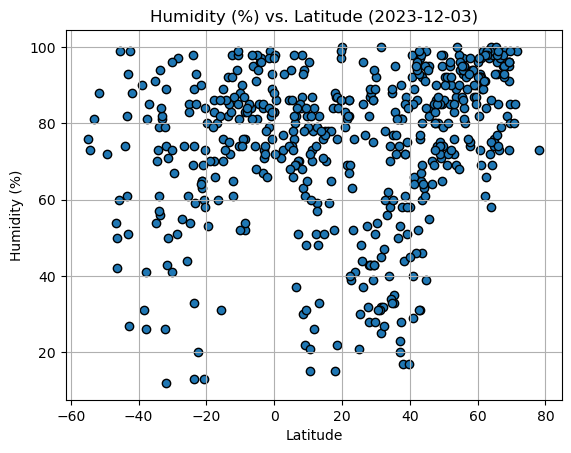

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity_scatter = city_data_df['Humidity']
lat_humidity_scatter = plt.scatter(lat_scatter, humidity_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
title = f'Humidity (%) vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

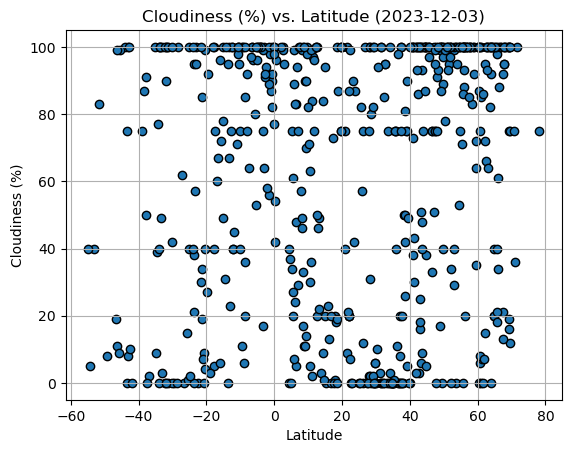

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness_scatter = city_data_df['Cloudiness']
lat_cloud_scatter = plt.scatter(lat_scatter, cloudiness_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
title = f'Cloudiness (%) vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

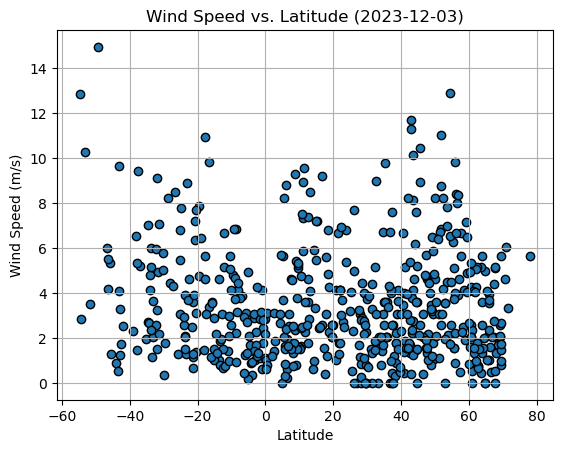

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_scatter = city_data_df['Wind Speed']
lat_wind_scatter = plt.scatter(lat_scatter, wind_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties

title = f'Wind Speed vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    yplacement = y.max()-((y.max()-y.min())/10)
    xplacement = x.min()+((x.max()-x.min())/10)
    return plt.scatter(x,y),plt.plot(x, regress_value, "r-"), plt.annotate(line_eq, (xplacement,yplacement), fontsize=12, color='red', weight='bold'), print(f'The r-value is: {rvalue}')
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vilyuchinsk,52.9306,158.4028,-3.85,72,29,3.55,RU,1701663993
3,talnakh,69.4865,88.3972,-34.25,85,12,0.81,RU,1701663993
4,tiaret,35.3710,1.3170,6.69,33,0,9.77,DZ,1701663993
5,sabang,5.8933,95.3214,27.31,76,99,1.66,ID,1701663993
8,wuwei,37.9281,102.6414,8.34,17,0,1.21,CN,1701663994


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <=0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.37,85,100,5.47,PN,1701663992
2,margaret river,-33.9500,115.0667,19.57,61,100,4.82,AU,1701663993
6,kiunga,-6.1219,141.2906,25.01,95,96,1.26,PG,1701663993
7,touros,-5.1989,-35.4608,26.13,81,100,4.92,BR,1701663994
9,grytviken,-54.2811,-36.5092,1.01,73,5,2.86,GS,1701663994


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8754481109622174


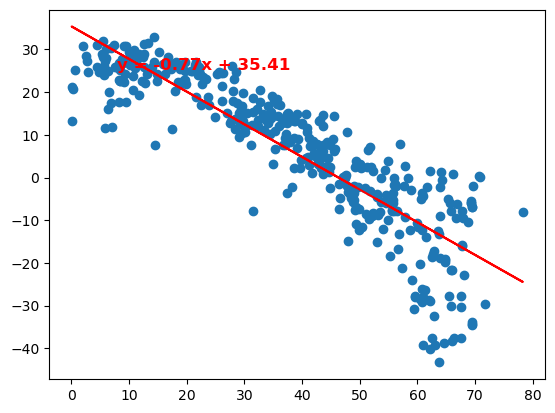

In [25]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.show()

The r-value is: 0.5944858337701626


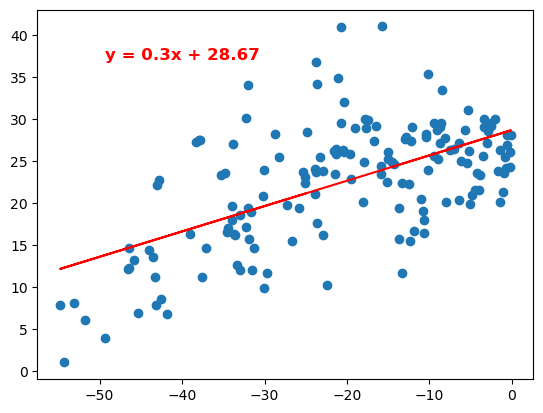

In [26]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.show()

**Discussion about the linear relationship:**   
For the Northern Hemisphere, the high 'r' value indicates a strong negative correlation of Max Temperatures and Latitude. As the datapoints move north from the equator, max temperatures reduce.
The 'r' value for the Southern Hemisphere has a moderate positive correlation of Max Temperature and Latitude.  As the datapoints move south from the equator, max tempartures reduce.
There are linear correlations of max tempertures and latitudes after separting datapoints of above and below the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3434761812005582


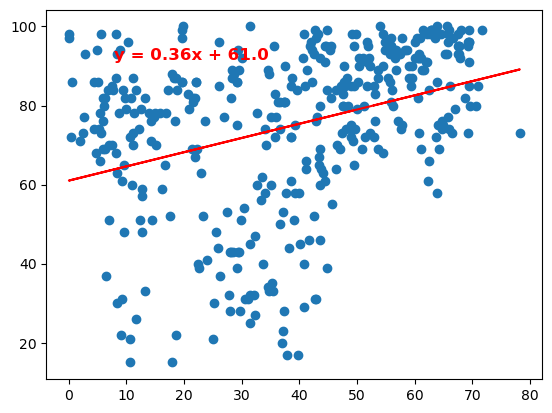

In [27]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.show()

The r-value is: 0.3083404213399981


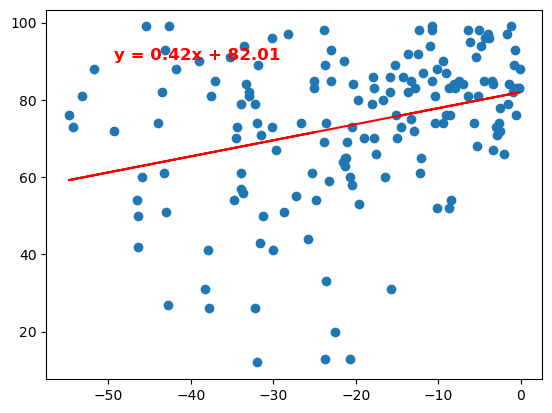

In [28]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.show()

**Discussion about the linear relationship:** 
The 'r' values for both Northern and Southern Hemisphere are at around 0.3  This indicates a weak, bordering on very weak, correlation of Latitude and Humidity. It appears that if you move north from the equator the humidity tends to rise, and as you move south from the equator the humidity decreases.  This indicates a weak positive correlation of humidity based on latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21855570268622856


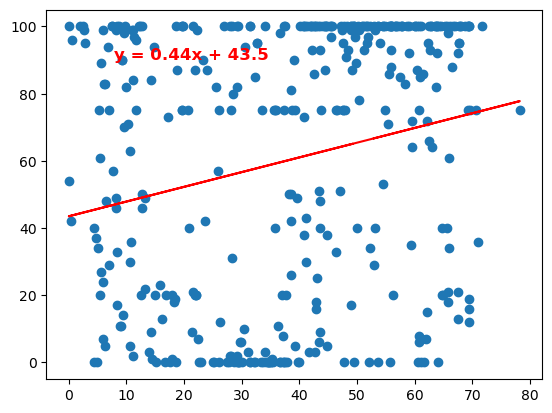

In [29]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.show()

The r-value is: 0.3458207800863521


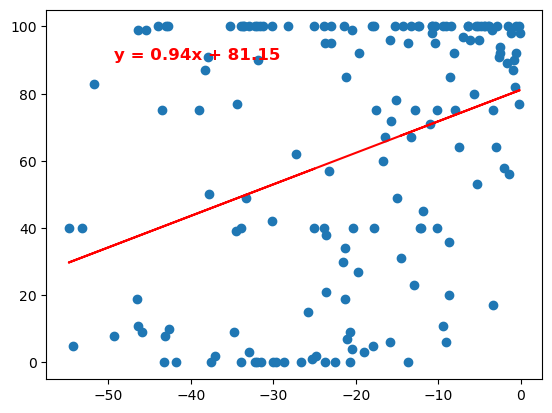

In [30]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.show()

**Discussion about the linear relationship:**  
In the Northern Hemisphere the 'r' value indicates there is no or a very weak correlation of Cloudiness and Latitude.  
For the Southern Hemisphere the 'r' value indicates that may be a weak positive correlation of cloudiness based on latitude.  
As you approach the equator from the south, there may be an increase in cloudiness, but as you move north from the equator there is no correlation.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017096608948157996


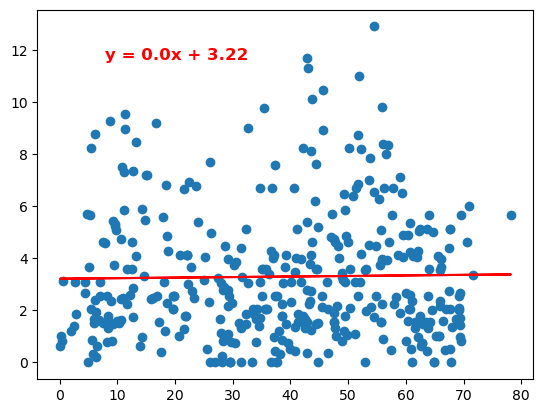

In [31]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.show()

The r-value is: -0.357406903620021


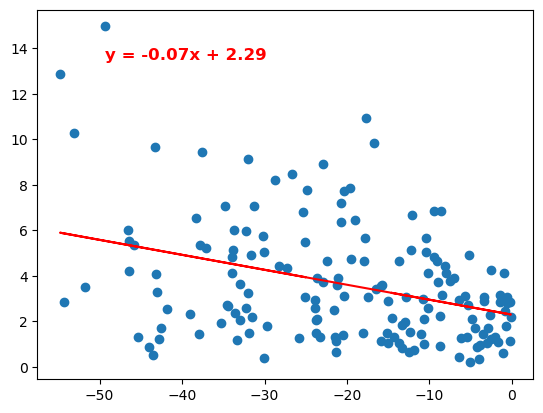

In [32]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere the 'r' value indicates no correlation of Wind Speed and Latitude.  
In the Southern Hemisphere the 'r' value indicates a weak negative correlation of Wind Speed based on Latitude.
As you move towards the equator from the south, wind speed may decrease, but after passing the equator there is no correlation.